In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
train_yes_dir = "E:/Machine Learning/Machine Learning/Neural Networks/CNN/Brain Tumar Detection/brain_tumor_dataset/Train/yes"
train_no_dir= "E:/Machine Learning/Machine Learning/Neural Networks/CNN/Brain Tumar Detection/brain_tumor_dataset/Train/no"
test_yes_dir= "E:/Machine Learning/Machine Learning/Neural Networks/CNN/Brain Tumar Detection/brain_tumor_dataset/Test/yes"
test_no_dir= "E:/Machine Learning/Machine Learning/Neural Networks/CNN/Brain Tumar Detection/brain_tumor_dataset/Test/no"

In [3]:
train_yes_names= os.listdir(train_yes_dir)
print(train_yes_names[:5])
print("=============================================================")
train_no_names= os.listdir(train_no_dir)
print(train_no_names[:5])
print("================================================================")
test_yes_names= os.listdir(test_yes_dir)
print(test_yes_names[:5])
print("===================================================================")
test_no_names= os.listdir(test_no_dir)
print(test_no_names[:5])

['Y1.jpg', 'Y10.jpg', 'Y100.JPG', 'Y101.jpg', 'Y102.jpg']
['1 no.jpeg', '10 no.jpg', '11 no.jpg', '12 no.jpg', '13 no.jpg']
['Y188.jpg', 'Y192.JPG', 'Y193.JPG', 'Y194.jpg', 'Y195.JPG']
['no 100.jpg', 'no 923.jpg', 'no 96.jpg', 'no 97.jpg', 'no 98.jpg']


In [4]:
print("Total train yes images : ",len(os.listdir(train_yes_dir)))
print("Total train no images : ",len(os.listdir(train_no_dir)))
print("Total test yes images : ",len(os.listdir(test_yes_dir)))
print("Total test no images : ",len(os.listdir(test_no_dir)))

Total train yes images :  135
Total train no images :  79
Total test yes images :  20
Total test no images :  19


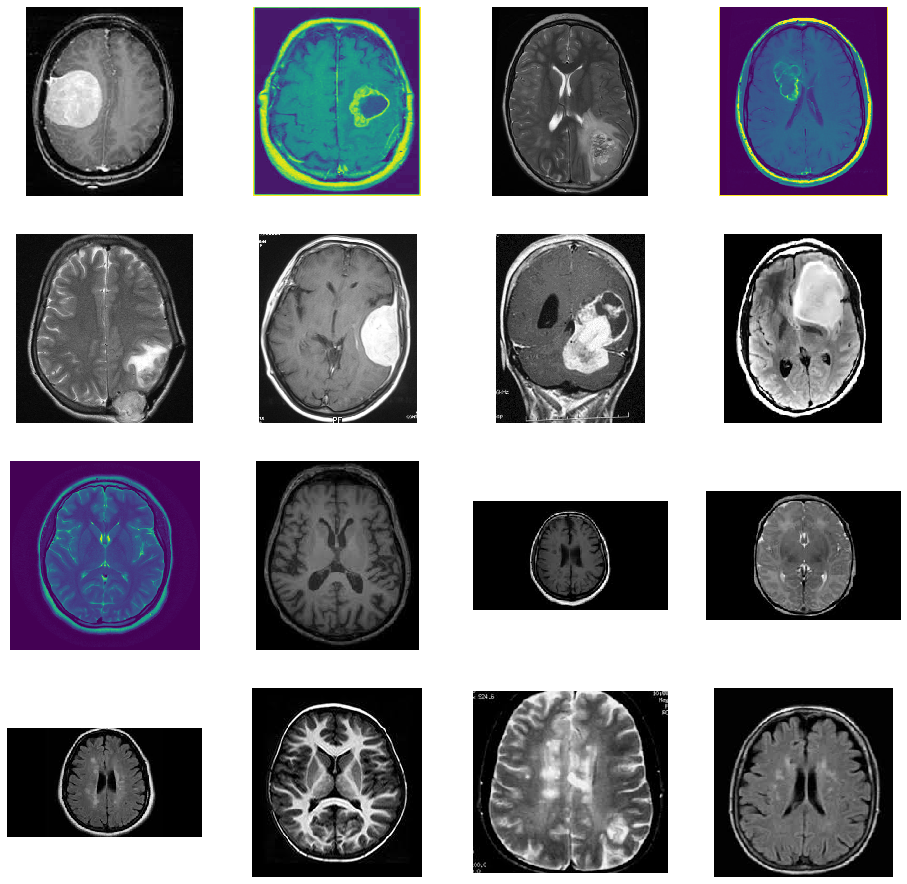

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows=4
ncols=4

pic_index= 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_yes_pix = [os.path.join(train_yes_dir, fname) 
                for fname in train_yes_names[pic_index-8:pic_index]]
next_no_pix = [os.path.join(train_no_dir, fname) 
                for fname in train_no_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_yes_pix+next_no_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

c:\python3.6\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\python3.6\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\python3.6\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\python3.6\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:544: FutureWarning: Passing (type, 1) or '1ty

In [7]:
train_datagen= ImageDataGenerator(rescale=1./255,
#                                   rotation_range=40,
#                                  width_shift_range=0.2,
#                                  height_shift_range=0.2,
#                                  shear_range=0.2,
#                                   zoom_range=0.2,
#                                   horizontal_flip=True,
#                                   fill_mode="nearest"
                                 )

test_datagen= ImageDataGenerator(rescale=1./255)

In [8]:
train_data_generator= train_datagen.flow_from_directory("E:/Machine Learning/Machine Learning/Neural Networks/CNN/Brain Tumar Detection/brain_tumor_dataset/Train",
                                                       target_size=(32,32),
                                                       batch_size=4,
                                                       class_mode="binary")

test_data_generator= test_datagen.flow_from_directory("E:/Machine Learning/Machine Learning/Neural Networks/CNN/Brain Tumar Detection/brain_tumor_dataset/Test",
                                                     target_size=(32,32),
                                                     batch_size=4,
                                                     class_mode="binary")

Found 214 images belonging to 2 classes.
Found 39 images belonging to 2 classes.


# Model 

In [9]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout

In [10]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9, padding='same', activation='relu', input_shape=(32,32,3))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.45))

model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9,padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(filters=36, kernel_size=9, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.15))


model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        3904      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 16)        20752     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 36)          4

In [12]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [13]:
history=model.fit_generator(train_data_generator,epochs=50,verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 54 steps
Epoch 1/50
54/54 [==============================] - 6s 113ms/step - loss: 0.6608 - accuracy: 0.61680s - loss: 0.6612 - accuracy: 0.
Epoch 2/50
54/54 [==============================] - 2s 34ms/step - loss: 0.6058 - accuracy: 0.6822
Epoch 3/50
54/54 [==============================] - 2s 35ms/step - loss: 0.6279 - accuracy: 0.6542
Epoch 4/50
54/54 [==============================] - 2s 34ms/step - loss: 0.5811 - accuracy: 0.7150
Epoch 5/50
54/54 [==============================] - 2s 34ms/step - loss: 0.5359 - accuracy: 0.7430
Epoch 6/50
54/54 [==============================] - 2s 35ms/step - loss: 0.5267 - accuracy: 0.7430
Epoch 7/50
54/54 [==============================] - 2s 35ms/step - loss: 0.4972 - accuracy: 0.7430
Epoch 8/50
54/54 [==============================] - 2s 34ms/step - loss: 0.4957 - accuracy: 0.7617
Epoch 9/50
54/54 [==============================] - 2s 

In [14]:
model.evaluate(test_data_generator)

  ...
    to  
  ['...']
10/10 [==============================] - 1s 103ms/step - loss: 1.1610 - accuracy: 0.5897


[1.1610117718577384, 0.5897436]

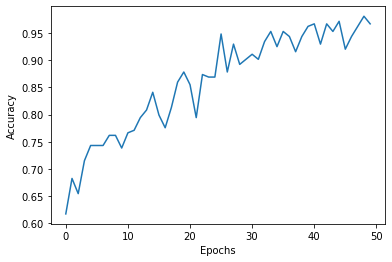

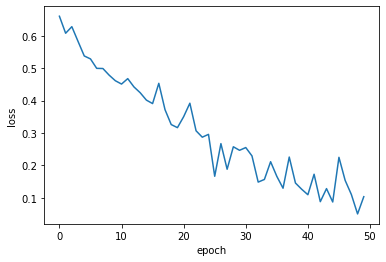

In [15]:
import matplotlib.pyplot as plt
train_acc= history.history["accuracy"]
plt.plot(train_acc)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

loss= history.history["loss"]
plt.plot(loss)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [16]:
model.save("braintumar.h5")

# Prediction

In [18]:
path="p1.jpg"
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np

In [20]:
img= image.load_img(path,target_size=(32,32))
x= img_to_array(img)
x= np.expand_dims(x,axis=0)

images= np.vstack([x])

classes= model.predict(images)

print("Confidence : ",classes[0])
if classes[0]>0.5:
    print(path + " is positive")
else:
    print(path + " is a negative")

Confidence :  [0.]


IndexError: index 1 is out of bounds for axis 0 with size 1